In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\khoirul haq\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [3]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import cross_val_score
#Import scikit-learn metrics module for accuracy calculation
#from sklearn import datasets
 
# membaca file 
data = pd.read_csv("F:/7_Semester/Machine Learning/projek/water_potability_clean.csv")
print(data.tail())
print(data.isnull().sum())

      index         ph    Hardness        Solids  Chloramines     Sulfate  \
2006   3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
2007   3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
2008   3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
2009   3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
2010   3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2006    390.410231        9.899115        55.069304   4.613843           1  
2007    329.266002       16.217303        28.878601   3.442983           1  
2008    439.893618       16.172755        41.558501   4.369264           1  
2009    415.886955       12.067620        60.419921   3.669712           1  
2010    526.424171       13.894419        66.687695   4.435821           1  
index              0
ph                 0
Hardness           0
Solids      

In [4]:
# Variabel independen
X = data.drop(["Potability"], axis = 1)
# Variabel dependen
Y = data["Potability"]
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0) # 70% training and 30% test

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [6]:
scores5 = cross_val_score(clf, X_test, y_test, cv=5)
scores10 = cross_val_score(clf, X_test, y_test, cv=10)
print(scores5 , scores10)

[0.96039604 0.96039604 0.99009901 0.99       0.94      ] [0.98039216 0.96078431 0.98039216 0.94       1.         1.
 0.96       1.         0.96       0.96      ]


In [7]:
from sklearn.metrics import classification_report
print("===============classification report============")
print(classification_report(y_test, y_pred))

===============classification report============
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       309
           1       0.99      0.99      0.99       194

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503



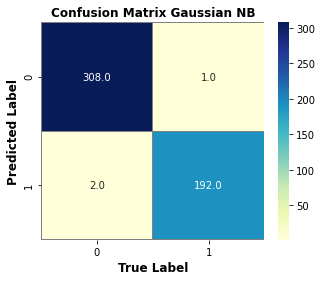

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conf_mat = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.ylabel("Predicted Label", fontsize='large', fontweight='bold')
plt.xlabel("True Label", fontsize='large', fontweight='bold')
plt.title("Confusion Matrix Gaussian NB", fontsize='large', fontweight='bold')
plt.show()
print()